In [98]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier



In [99]:
train_df = pd.read_csv('./input/titanic/train.csv')
test_df = pd.read_csv('./input/titanic/test.csv')
combine = [train_df, test_df]



In [100]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
train_df.shape

(891, 12)

### my idea about this probelm
Firstly, explore the relationship between each single variable and the survival

And consider the simple model, and then if the simple model is underfitting , then consider complicated model. 

#### First step, consider the age and survival as following
- using histogram?  may be a good choice

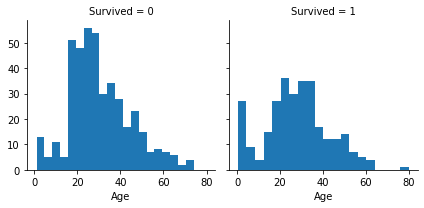

In [102]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

From the distribution above, the young between(20, 30) has a lower survival. While the older(70-80) and the infant has a higher survival. 


In [103]:
#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked','SibSp', 'Parch', 'Age', 'Fare'] #pretty name/values for charts

In [104]:
for x in data1_x:
    if train_df[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(train_df[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 



In [ ]:
#### My Initial Idea
Choose the simple variable to do the machine learning test 

In [105]:
for dataset in combine:
    dataset.drop(['Name','Ticket','SibSp','Parch','Fare','Cabin', 'PassengerId'], axis = 1, inplace=True)
train_df.head(1)


,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S


In [124]:
for dataset in combine: 
    dataset.loc[dataset['Sex']=='male', 'Sex'] = 1
    dataset.loc[dataset['Sex']=='female', 'Sex'] = 2

In [107]:
train_df.head(1)

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.0,S


In [125]:
for dataset in combine:
    dataset.loc[dataset['Embarked']=='C', 'Embarked'] = 1
    dataset.loc[dataset['Embarked']=='Q', 'Embarked'] = 2
    dataset.loc[dataset['Embarked']=='S', 'Embarked'] = 3

In [131]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [136]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i + 1) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    
    print(guess_ages)
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i + 1) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

[[36.  29.  21.5]
 [35.  28.  21.5]]
[[42. 28. 24.]
 [41. 24. 22.]]


,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22,3
1,1,1,2,38,1
2,1,3,2,26,3
3,1,1,2,35,3
4,0,3,1,35,3


In [143]:
train_df.shape
train_df = train_df.dropna()

In [164]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df
X_test.shape

(418, 4)

In [165]:
X_train.head(2)

,Pclass,Sex,Age,Embarked
0,3,1,22,3
1,1,2,38,1


In [166]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79.19

In [167]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.501206
2,Age,-0.033860
3,Embarked,-0.242245
0,Pclass,-1.165095


In [168]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


85.71

In [169]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.38

In [170]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.84

In [171]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.19

In [172]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.64

In [173]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

89.54

In [174]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

74.35

In [175]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.54

In [176]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.54
8,Decision Tree,89.54
0,Support Vector Machines,85.71
1,KNN,85.38
7,Linear SVC,79.64
2,Logistic Regression,79.19
5,Perceptron,79.19
4,Naive Bayes,77.84
6,Stochastic Gradient Decent,74.35


In [177]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

89.54

In [178]:
new_test_df = pd.read_csv('./input/titanic/test.csv')
new_test_df.head(5)
new_test_df.shape
new_test_df['Age'].isnull().sum()
new_test_df.shape

(418, 11)

In [179]:
Y_pred.shape

(418,)

In [182]:
new_test_df = pd.read_csv('./input/titanic/test.csv')

In [183]:
submission = pd.DataFrame({
        "PassengerId": new_test_df["PassengerId"],
        "Survived": Y_pred
    })

In [184]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [185]:
submission.to_csv("./submit.csv", index=False)

### Conclusion

I only got 0.72 score in my first sumission. There may be a huge improvement for the model.

### Improvement
- splitting the data into 